# Quantitative Analysis of Stock Market Performance using Python

# Project Overview

This notebook explores the performance and behavior of selected stocks through data-driven quantitative analysis. 
By applying mathematical and statistical techniques, the project evaluates stock performance, volatility, and 
the relationship between risk and return.

Using historical price data, the analysis highlights key market patterns and insights that support informed 
investment and portfolio decisions.

# Objectives

The main objectives of this analysis are to:

1. Understand stock behavior by analyzing historical price data.

2. Compute key financial metrics such as returns, volatility, and correlations.

3. Visualize market trends and relationships across multiple stocks.

4. Compare stock performance over a given period using percentage change.

5. Assess risk vs. return profiles to evaluate the balance between reward and volatility.

In [ ]:
#Import necessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display


In [2]:
# Load the dataset
stocks_data = pd.read_csv("stocks.csv") 

In [3]:
#Display the first few rows of the dataset
print(stocks_data.head()) 

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


The dataset contains the following columns for the stock market data: 
- Ticker: The stock ticker symbol.
- Date: The trading date.
- Open: The opening price of the stock of the day.
- High : The highest price of thestock during the day.
- Low : The lowest price of the stock during the day.
- Close: The closing price of the stock for the day.
- Adj close: The adjusted closing price, which accounts for all corporate actions such as dividends,stock splits,etc.
- Volume : The number of shares traded during the day.


To perform a comprehensive quantitative analysis, several statistical and financial techniques can be applied to the dataset. These include:

1. **Descriptive Statistics:** Summary statistics(mean,median,standard deviation,etc.) for each stock.

2. **Time Series Analysis:** Trends and patterns over time, especially for closing prices.

3. **Volatility Analysis:** How much the stock price flutuates over a period.

4. **Correlation Analysis:** How stock prices of different companies related to each other.

5. **Comparative Analysis:** Comapring the performance of different stocks.

6. **Risk-Return Trade-off Analysis:** Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.

The following sections apply each concept of quantitative analysis to the stock market dataset in a structured, step-by-step manner.

## Descriptive Statistics

Descriptive Statistics will provide summary statitstics for each stock in the dataset. This step involves calculating metrics such as the mean, median, standard deviation, and other measures that describe the distribution and variability of stock prices.

By focusing on the Close prices, these statistics help in understanding the central tendency and dispersion of each stock’s performance over time. This forms the foundation for deeper financial insights such as volatility and risk analysis.

In [4]:
# Descriptive Statistics for each stock
descriptive_stats = stocks_data.groupby('Ticker')['Close'].describe()

print(descriptive_stats)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


A break down for the rults in each stock:

**AAPL(APPLE INC)**

- **Count:** 62.0 ( The number of observations or trading days included in the dataaset for AAPL)
- **Mean:** 158.24(The average closing price)
- **Standard Deviation:** 7.36(Measures the amount of variation or dispersion of closing prices)
- **Minimum:** 145.31(The lowest closing price in the dataset)
- **25th Percentile:** 152.08(25% of the closing prices are below this value)
- **Median(50%):** 158.06(The middle value of the closing prices) 
- **75th Percentile:** 165.16(75% of the closing prices are below this value)
- **Maximum:** 173.57(The biggest closing price in the dataset)

 **GOOG (Alphabet Inc.)**

Similar statistics as AAPL, but for GOOG. The mean closing price is 100.63, with a standard deviation of 6.28, indicating less variability in closing prices compared to AAPL.

**MSFT (Microsoft Corporation)**

The dataset includes the same number of observations for MSFT. It has a higher mean closing price of 275.04 and a higher standard deviation of 17.68, suggesting greater price variability than AAPL and GOOG.

**NFLX (Netflix Inc.)**

NFLX shows the highest mean closing price (327.61) among these stocks and the highest standard deviation (18.55), indicating the most significant price fluctuation.

## Time Series Analysis
This is to examine trends and patterns over time, focusing on the closing prices:

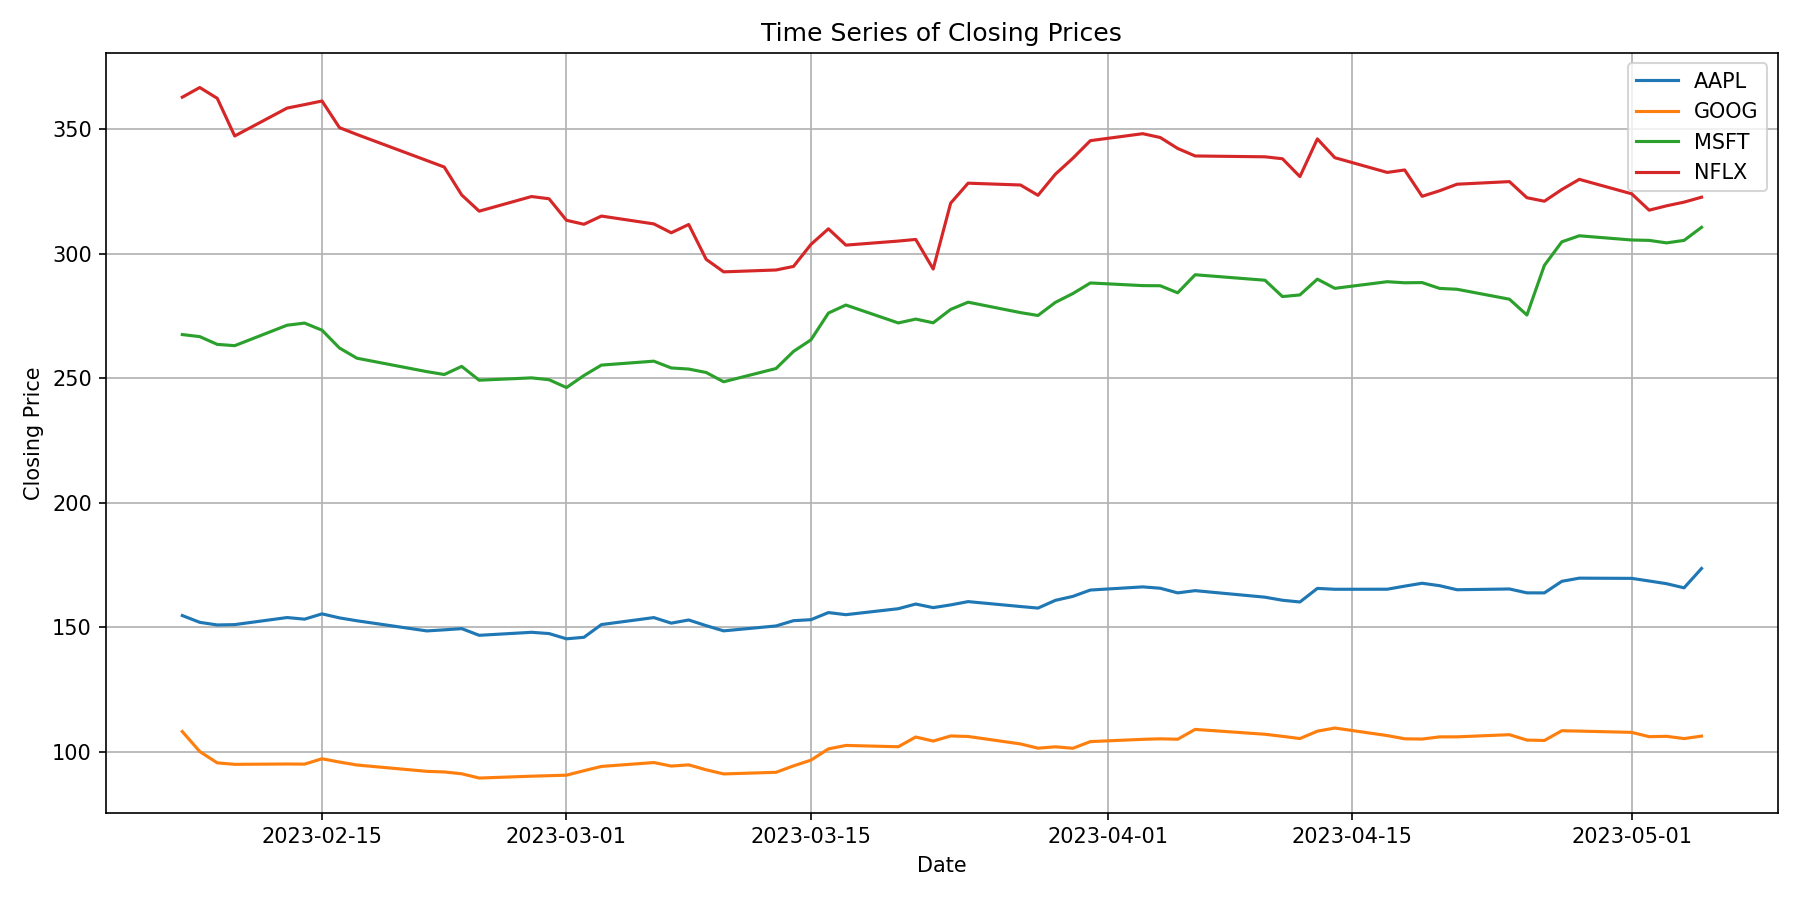

In [ ]:
# Time Series Analysis
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
if 'pivot_data' not in globals():
    pivot_data = stocks_data.pivot_table(index='Date', columns='Ticker', values='Close').sort_index()

# Plotting Time Series using Matplotlib
plt.figure(figsize=(12,6))
for col in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[col], label=col)
plt.title('Time Series of Closing Prices')
plt.xlabel('Date'); plt.ylabel('Closing Price')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.savefig("time_series_matplotlib.png", dpi=150)
display(Image("time_series_matplotlib.png"))
plt.close()

The above plot displays the time series of the closing prices for each stock(AAPL, GOOG, MSFT, NFLX) over the observed period. Here are some key observations:

1. **Trend:** Each stock shows its unique trend over time.For instance, AAPL and MSFT exhibit a genera; upward trend in this period.

2. **Volatility:** There is a noteable volatilty in the stock prices. For example, NFLX shows more pronounced fluctuatuions comapred to others.

3. **Comparative Performance:** When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG in this dataset.


## Volatility Analysis

The next step focuses on volatility analysis, which involves calculating and comparing the volatility(standard deviation) of the closing prices for each stock. This measure provides insight into the degree of price fluctuation experienced by each stock over the observed period.

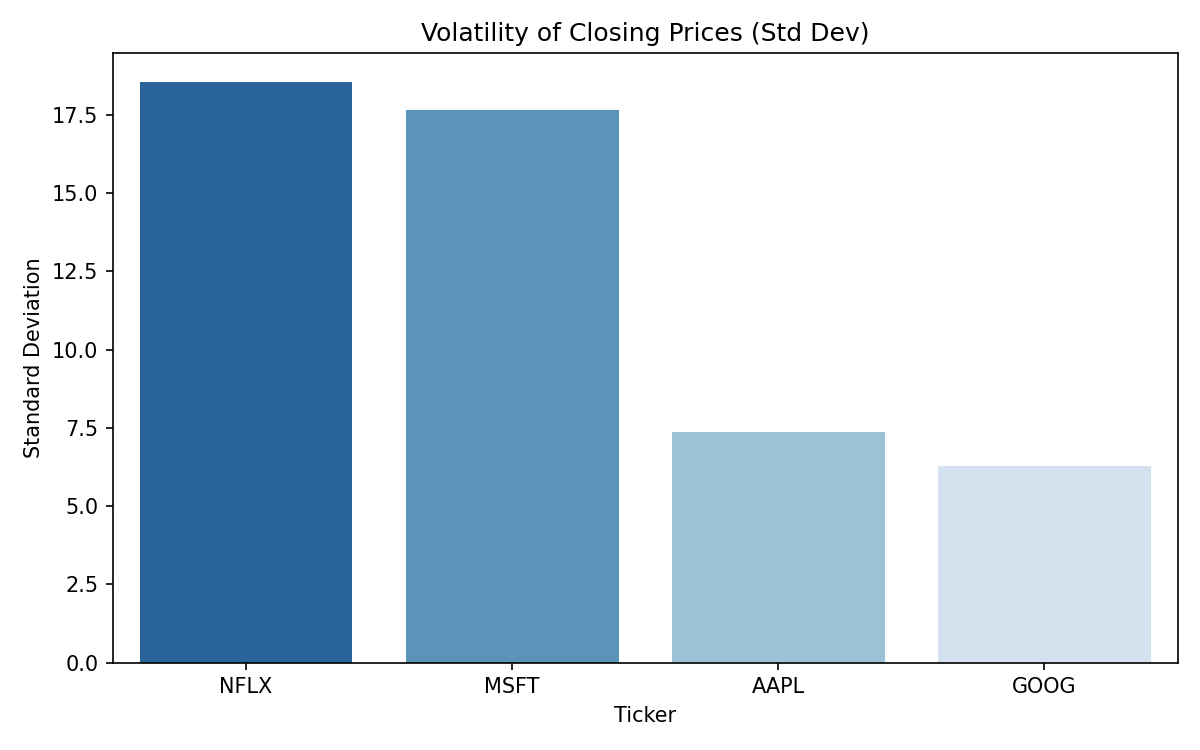

In [ ]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

# Plotting Volatility using Matplotlib
plt.figure(figsize=(8,5))
sns.barplot(x=volatility.index, y=volatility.values, palette="Blues_r")
plt.title('Volatility of Closing Prices (Std Dev)')
plt.xlabel('Ticker'); plt.ylabel('Standard Deviation')
plt.tight_layout()
plt.savefig("volatility_matplotlib.png", dpi=150)
display(Image("volatility_matplotlib.png"))
plt.close()

The bar chart  and the accompanying data show  the volatility(measured as stsndard deviation) of the closing prices for each stock. Here is how they rank in terms of volstility:

1. **NFLX:** Highest volatilty with a standard deviation of approximate;y 18.55.
2. **MSFT:** Next highest with a standard deviation of around 17.68.
3. **AAPL:** Lower volatility compared to NFLX and MSFT, with a standard deviation of about 7.36.
4. **GOOG:** The least volatile in this set, witha standard deviation of approximately 6.28.

It indicates that NFLX and MSFT stocks were most prone to price fluctuations during this period compared to AAPL and GOOG. 

## Correlation Analysis
The next step is to perform a Correlation Analysis to understand how the stock prices of these companies are related to each other:

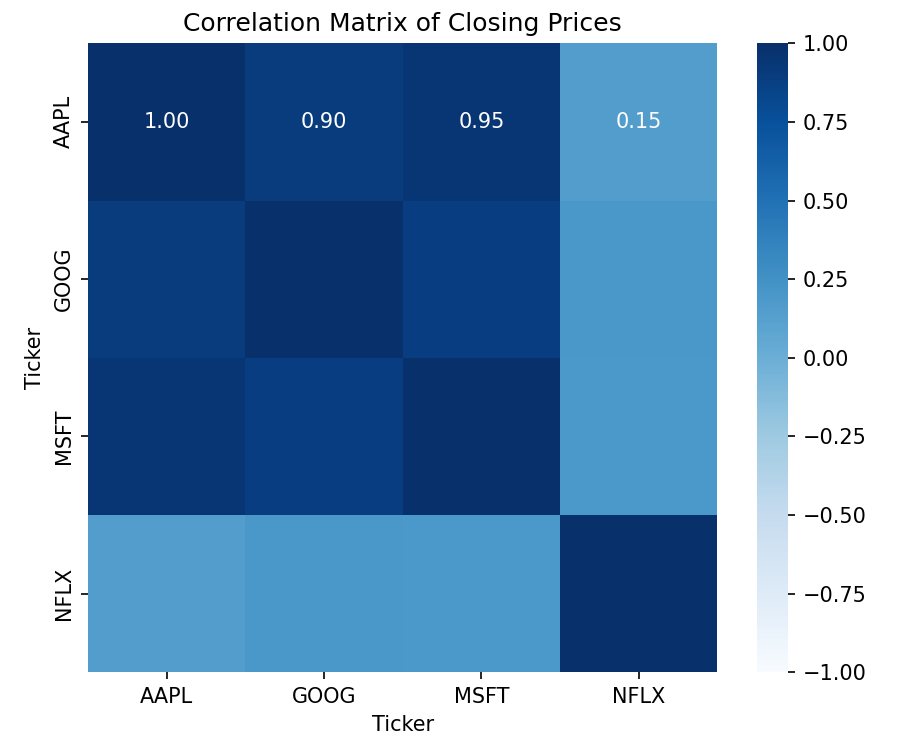

In [ ]:
#Corelation Analysis
correlation_matrix = pivot_data.corr()

# Plotting Correlation Matrix using Matplotlib
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", vmin=-1, vmax=1, square=True, fmt=".2f")
plt.title('Correlation Matrix of Closing Prices')
plt.tight_layout()
plt.savefig("correlation_matplotlib.png", dpi=150)
display(Image("correlation_matplotlib.png"))

#Show the figure
plt.close()


The heatmap above dispalys the correlation matrix of the closing prices of the four stocks(AAPL, GOOGL, MSFT NFLX).
Here is what the correlation coeffiecients suggest:

- Values close to +1 indicate a strong positive correlation, meanining that as one stock's price increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation,where one stock's price increase corresponds to a decrease in the other.
-Values around 0 indicate a lack of corrrrelation.

From the heatmap, most stock pairs show positive correlations, indicating that the selected stocks generally move in similar directions, likely influenced by broader market trends.

- **AAPL** and **MSFT** (≈ 0.91): A very strong positive correlation, meaning both stocks often rise and fall together due to their shared presence in the tech sector.

- **GOOG** and **MSFT** (≈ 0.88): A strong correlation, showing that Google and Microsoft exhibit similar price movements, though slightly less aligned than AAPL and MSFT.

- **NFLX** and **AAPL** (≈ 0.65): A moderate correlation, suggesting Netflix’s price movements are more independent, likely influenced by different market drivers.

These differences in correlation indicate that while the stocks generally move together, their relationships vary in strength, providing potential for diversification.


## Comparative Analysis

This section focuses on comparing the performance of different stocks based on their overall returns during the observed period. The percentage change in closing prices from the start to the end of the period is calculated for each stock to assess their relative performance.

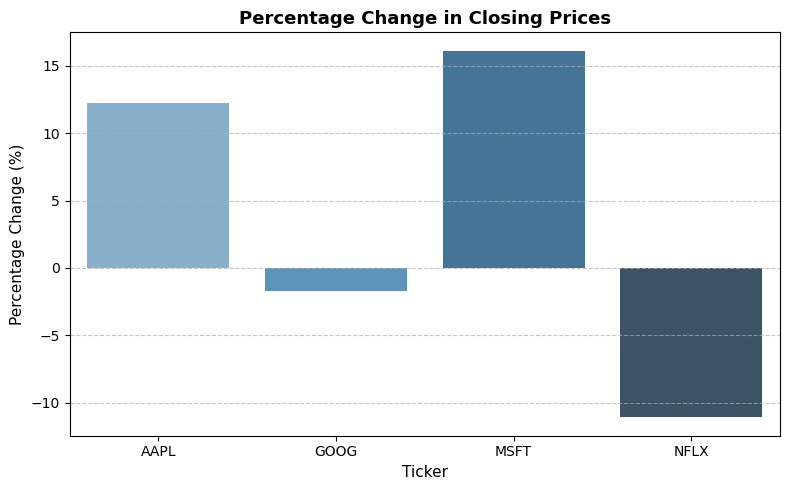

In [ ]:
# Comparative Analysis
percenatge_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100


# Plotting Percentage Change using Matplotlib
plt.figure(figsize=(8,5)) 
sns.barplot(x=percenatge_change.index, y=percenatge_change.values, palette="Blues_d")
plt.title('Percentage Change in Closing Prices', fontsize=13, weight='bold') 
plt.xlabel('Ticker', fontsize=11)
plt.ylabel('Percentage Change (%)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




The bar chart and the accompanying data show the percentage change in the closing prices of the stocks from the start to the end of the observed period:

- **MSFT:** The highest positive change of approximately 16.10%.

- **AAPL:** Exhibited a positive change of approximately 12.23%. It indicates a soliid performance,though slightly lower than MSFT's.

- **GOOG:** Showed a slight negative change of about -1.69%. It indicates a minor decline in its stock price over the observed period.

- **NFLX:** Experienced the most significant negaative change, at approximately -11.07%. It suggests a notable decrease in its stock price during the period.


## Daily Risk Vs. Return Analysis

This section evaluates the relationship between risk and return for each stock by calculating the average daily return and the standard deviation of daily returns, The standard deviation serves as a measure of risk, indicating the degree of price volatility,while the average daily return represents the expected reward.

By plotting these values,the analysis highlights each stock's risk-return porofile.Stocks with higher average  returns and lower levels of risk are generally more attractive, though the ideal choice ultimately depends on the investor's risk tolerance and investment objectives.

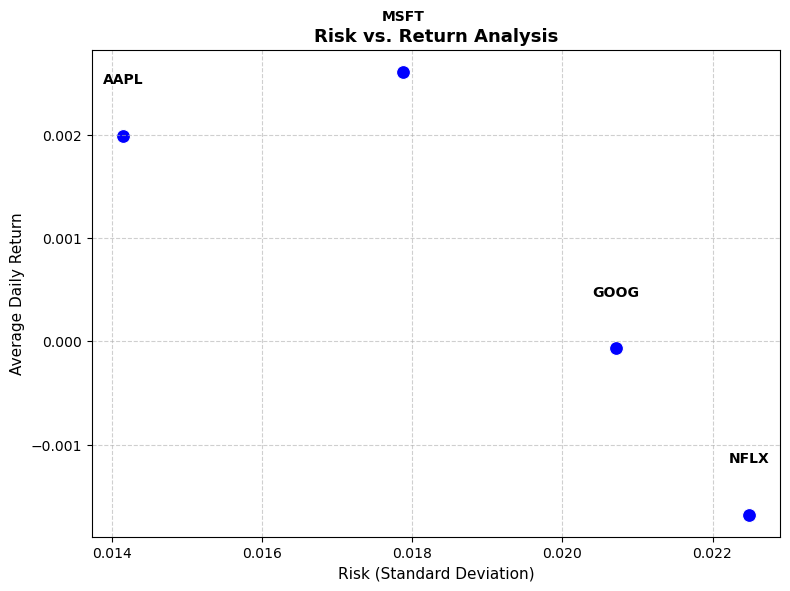

In [24]:
#Risk Vs. Return Analysis
daily_returns = pivot_data.pct_change().dropna()

#Calculate average daily return and standard deviation(risk) 
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

#create a DataFrame for plotting
risk_return_df = pd.DataFrame({'Average Daily Return': avg_daily_return, 'Risk (Std Dev)': risk})

#Plot using Matplotlib
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Risk (Std Dev)', 
    y='Average Daily Return', 
    data=risk_return_df, 
    s=100, 
    color='blue'
)

#Annotate each point with the ticker symbol
for i in range(len(risk_return_df)):
    plt.text(
        x=risk_return_df['Risk (Std Dev)'].iloc[i], 
        y=risk_return_df['Average Daily Return'].iloc[i] + 0.0005,
        s=risk_return_df.index[i],
        fontsize=10,
        weight='bold',
        ha='center'
    )


#Finalize the plot
plt.title('Risk vs. Return Analysis', fontsize=13, weight='bold')
plt.xlabel('Risk (Standard Deviation)', fontsize=11)
plt.ylabel('Average Daily Return', fontsize=11)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("risk_return_matplotlib.png", dpi=150)
plt.show()

So, AAPL shows the lowest risk combined with a positive avr=erage daily return,suggesting a more stable invedtment with consistent returns. GOOG has a higher volaatility than AAPL and, on average,a slightly negative daily return, indicating a riskier and on less rewarding investment during this period.

MSFT shows moderate risk with the highest average daily return, suggesting a potentially more rewarding investment, although withthe higher voaltility compared to AAPL. NFLX exhibits the highest risk and a negative average daily return indicating it was the most volatileand least rewarding investment among these stocks over the analyzed period.

# Conclusion

This analysis demonstrates how quantitative techniques can be applied to evaluate stock market performance using Python. Quantitative analysis leverages mathematical and statistical methods to assess stock behavior, identify trends, and measure risk and return.

By examining historical data across multiple stocks, valuable insights were drawn into price volatility, correlations, comparative performance, and the trade-off between risk and reward key elements that support data-driven investment decision-making.